In [2]:
import matplotlib.pyplot as plt
from solver import solver
from collisions import equilibrium, random_distribution
from collisions import scattering, p_annihilation, s_annihilation
from collisions import scattering_units

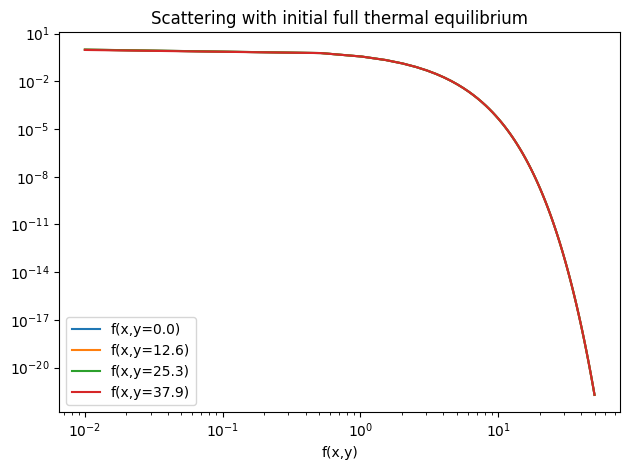

In [31]:
# grid size  
x_start, x_end = 0.01, 50
y_start, y_end = 0.01, 50
y_gridpoints = 100

x_span = (x_start, x_end)
y_span = (y_start, y_end, y_gridpoints)


# interaction strength
Gamma = 1

# solve for scattering with initial condition = full thermal equilibrium 
solv = solver(x_span,y_span,Gamma,equilibrium,scattering,rtol=1e-9,atol=1e-9)
xs = solv[0]
ys = solv[1]    
fs = solv[2]


N = [0,25,50,75]
for n in N:
    plt.loglog(ys,fs[:,n],label=f"f(x,y={ys[n]:.01f})")   
    plt.xlabel("y=p/T")
    plt.xlabel("f(x,y)")
plt.legend()
plt.title("Scattering with initial full thermal equilibrium")
plt.tight_layout()

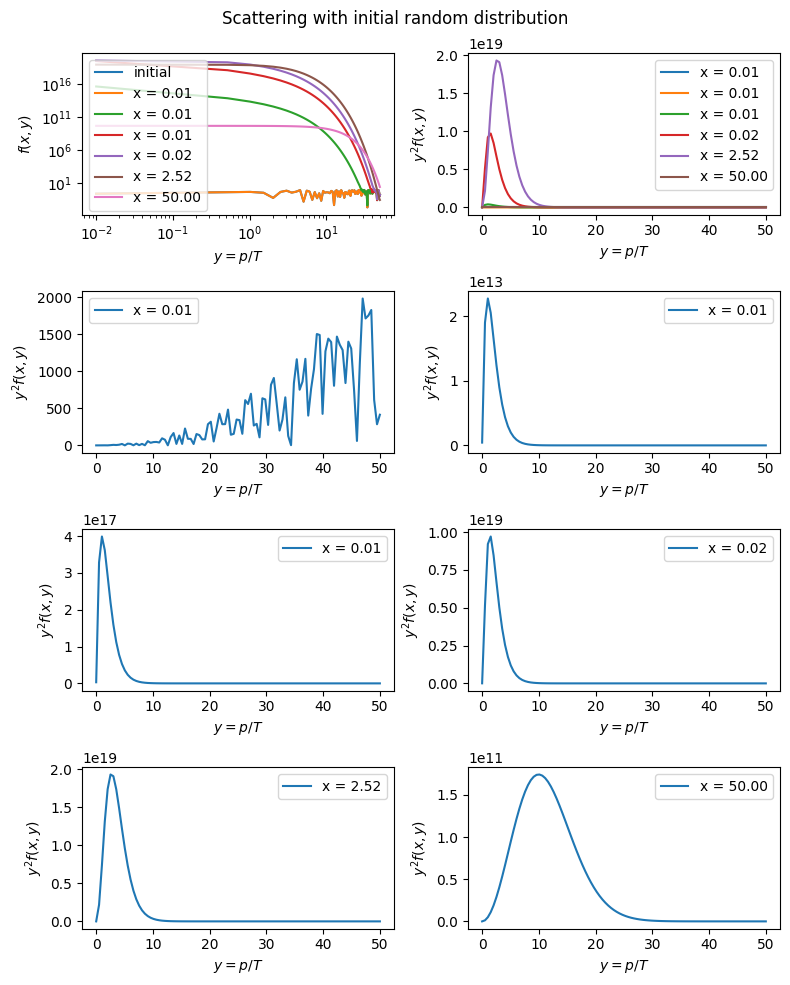

In [34]:
# solve for scattering with initial condition = random distribution
# grid size  
x_start, x_end = 0.01, 50
y_start, y_end = 0.01, 50
y_gridpoints = 100
Gamma = 1


x_span = (x_start, x_end)
y_span = (y_start, y_end, y_gridpoints)

solv = solver(x_span,y_span,Gamma,random_distribution,scattering,rtol=1e-6,atol=1e-6)
xs = solv[0]
ys = solv[1]    
fs = solv[2]

steps = [0,20,50,100,200,-1]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
axs[0,0].loglog(ys,fs[:,0], label= "initial")
for n in steps:
    axs[0,0].plot(ys,fs[:,n], label= f"x = {xs[n]:0.2f}")
axs[0,0].set_xlabel(r"$y = p/T$")
axs[0,0].set_ylabel (r"$f(x,y)$")
axs[0,0].legend()

for n in steps:
    yyfs = [ys[i] * ys[i] * fs[i][n] for i in range(len(ys))]
    axs[0,1].plot(ys,yyfs, label= f"x = {xs[n]:0.2f}")
axs[0,1].set_xlabel(r"$y = p/T$")
axs[0,1].set_ylabel (r"$y^2f(x,y)$")
axs[0,1].legend()


indicies = [[steps[i],steps[i+1]] for i in range(0,len(steps)-1,2)]
for i in range(1,4):
    for j in range(0,2):
        index = indicies[i-1][j]
        yyfs = [ys[k] * ys[k] * fs[k][index] for k in range(len(ys))]
        axs[i,j].plot(ys,yyfs, label= f"x = {xs[index]:0.2f}")
        axs[i,j].set_xlabel(r"$y = p/T$")
        axs[i,j].set_ylabel (r"$y^2f(x,y)$")
        axs[i,j].legend()

plt.suptitle("Scattering with initial random distribution")
fig.tight_layout()

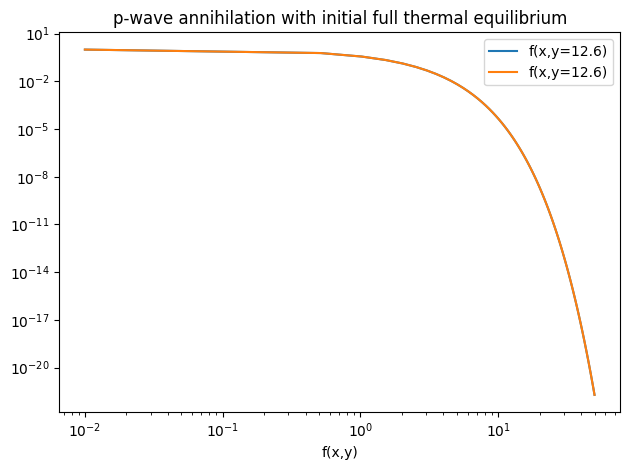

In [37]:
# grid size  
x_start, x_end = 0.01, 50
y_start, y_end = 0.01, 50
y_gridpoints = 100

x_span = (x_start, x_end)
y_span = (y_start, y_end, y_gridpoints)


# interaction strength
Gamma = 1

# solve for scattering with initial condition = full thermal equilibrium 
annihilation = solver(x_span,y_span,Gamma,equilibrium,p_annihilation,rtol=1e-9,atol=1e-9)
elastic = solver(x_span,y_span,Gamma,equilibrium,scattering,rtol=1e-9,atol=1e-9)
xs0 = annihilation[0]
ys0 = annihilation[1]    
fs0 = annihilation[2]

xs1 = elastic[0]
ys1 = elastic[1]
fs1 = elastic[2]

N = [25]
for n in N:
    plt.loglog(ys0,fs0[:,n],label=f"f(x,y={ys0[n]:.01f})") 
    plt.loglog(ys0,fs1[:,n],label=f"f(x,y={ys0[n]:.01f})")   
    plt.xlabel("y=p/T")
    plt.xlabel("f(x,y)")
plt.legend()
plt.title("p-wave annihilation with initial full thermal equilibrium")
plt.tight_layout()